# Suivi TIPE

## Séance du Vendredi 25 mars
Simuler la réaction de la chaussure par un ressort par des équations.
Résolution numérique:

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pad

# Exploitation données tracker
Importation et formatage des données

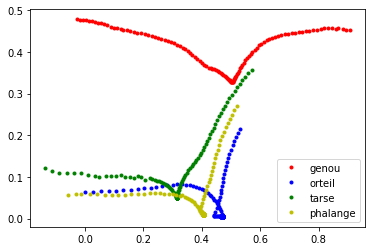

         t  x_orteil  y_orteil  v_x_orteil  v_y_orteil  a_x_orteil  \
0    0.000  0.001126   0.06421         NaN         NaN         NaN   
1    0.008  0.026990   0.06440       3.290     0.10200         NaN   
2    0.017  0.055960   0.06591       3.288     0.10800     -12.090   
3    0.025  0.081790   0.06619       3.020     0.09393     -14.830   
4    0.033  0.106000   0.06748       3.032     0.13100       2.946   
..     ...       ...       ...         ...         ...         ...   
110  0.917  0.505000   0.17700       0.734     1.24600       7.353   
111  0.925  0.511000   0.18700       0.749     1.19600       2.624   
112  0.933  0.517000   0.19700       0.760     1.13000       4.061   
113  0.942  0.524000   0.20600       0.826     1.17200         NaN   
114  0.950  0.531000   0.21600         NaN         NaN         NaN   

     a_y_orteil  x_genou  y_genou  v_y_genou  ...  v_y_phalange  v_x_phalange  \
0           NaN -0.02660    0.479        NaN  ...           NaN           NaN 

In [3]:
orteils = pad.read_csv("AnalyseVideo/Malaury/orteils.csv")
genou = pad.read_csv("AnalyseVideo/Malaury/genou.csv")
phalange = pad.read_csv("AnalyseVideo/Malaury/phalanges.csv")
tarse = pad.read_csv("AnalyseVideo/Malaury/tarse.csv")

d1 = pad.merge_asof(orteils,genou, on="t",suffixes=("_orteil","_genou"))
d2 = pad.merge_asof(phalange,tarse, on="t",suffixes=("_phalange","_tarse"))
d = pad.merge_asof(d1,d2, on="t")

plt.plot(d['x_genou'],d['y_genou'], 'r.', label='genou')
plt.plot(d['x_orteil'],d['y_orteil'], 'b.', label='orteil')
plt.plot(d['x_tarse'],d['y_tarse'], 'g.', label='tarse')
plt.plot(d['x_phalange'],d['y_phalange'], 'y.', label='phalange')
plt.legend()
plt.show()

print(d)

In [4]:
#Utilisation du produit scalaire
def angle(a_x,a_y,b_x,b_y,c_x,c_y):
    V_BA = np.array([a_x-b_x,a_y-b_y])
    V_BC= np.array([c_x-b_x,c_y-b_y])
    BABC = np.dot(V_BA, V_BC)
    BABC_Norm = np.linalg.norm(V_BA) * np.linalg.norm(V_BC)
    return np.arccos(BABC/BABC_Norm)


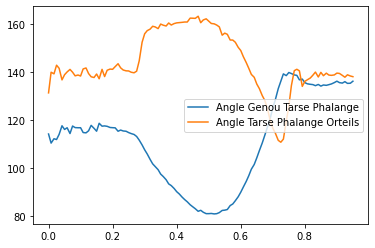

In [5]:
def angle_gtp(d):
    return angle(d['x_genou'], d['y_genou'],d['x_tarse'],d['y_tarse'],d['x_phalange'],d['y_phalange'])
def angle_tpo(d):
    return angle(d['x_tarse'],d['y_tarse'],d['x_phalange'],d['y_phalange'],d['x_orteil'], d['y_orteil'])
    
Anglegtp = d.apply(angle_gtp,axis=1)
Angletpo = d.apply(angle_tpo,axis=1)
plt.plot(d['t'],np.rad2deg(Anglegtp), label="Angle Genou Tarse Phalange")
plt.plot(d['t'],np.rad2deg(Angletpo), label="Angle Tarse Phalange Orteils")
plt.legend()
plt.show()

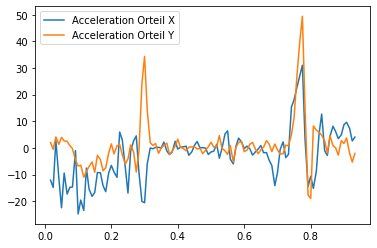

In [6]:
def acc(x,y):
    ACC = np.array([x,y])
    return np.linalg.norm(ACC)

def acc_orteil(d):
    return acc(d['a_x_orteil'],d['a_y_orteil'])

Acco = d.apply(acc_orteil,axis=1)
plt.plot(d['t'],d['a_x_orteil'], label="Acceleration Orteil X")
plt.plot(d['t'],d['a_y_orteil'], label="Acceleration Orteil Y")
plt.legend()
plt.show()

In [16]:
v_x_pied = (d['v_x_orteil'] + d['v_x_phalange'] + d['v_x_tarse'])/3
v_y_pied = (d['v_y_orteil'] + d['v_y_phalange'] + d['v_y_tarse'])/3

x_pied = (d['x_orteil'] + d['x_phalange'] + d['x_tarse'])/3
y_pied = (d['y_orteil'] + d['y_phalange'] + d['y_tarse'])/3

v_pied = np.sqrt(v_x_pied**2 + v_y_pied**2)
m_pied = 2.7
g = 9.81

ec_pied = 1/2 * m_pied * v_pied**2

ep = m_pied * g * y_pied


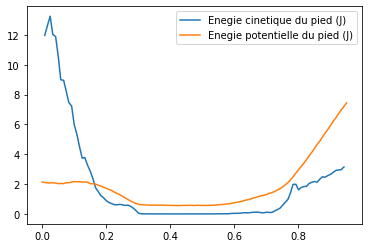

In [19]:
plt.plot(d['t'], ec_pied, label="Enegie cinetique du pied (J)")
plt.plot(d['t'], ep, label="Enegie potentielle du pied (J)")
plt.legend()
plt.show()